In [3]:
import pandas as pd
import numpy as np
import re
from textblob import TextBlob
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


In [4]:
# !pip install textblob

In [5]:
df = pd.read_csv("donald_trump_tweets.csv")

# Clean tweets
def clean_tweet(tweet):
    tweet = str(tweet).lower()
    tweet = re.sub(r"http\S+|www.\S+", "", tweet)
    tweet = re.sub(r"@[A-Za-z0-9_]+", "", tweet)
    tweet = re.sub(r"#", "", tweet)
    tweet = re.sub(r"[^a-zA-Z\s]", "", tweet)
    tweet = re.sub(r"\s+", " ", tweet).strip()
    return tweet

df["Cleaned_Tweet"] = df["Tweet"].apply(clean_tweet)
df.head()


,Date,Tweet,Cleaned_Tweet
0,2025-08-08 06:37:19+00:00,🏛️ Trump Welcomes Crypto to 401(k) Plans: A ne...,trump welcomes crypto to k plans a new executi...
1,2025-08-08 06:37:09+00:00,@IslamInvasion Y’all need a Donald Trump 2.0,yall need a donald trump
2,2025-08-08 06:37:06+00:00,@_SueSue_1 @Whitlina @joma_gc @JamesCarville I...,if a single living democrat was on the epstein...
3,2025-08-08 06:37:00+00:00,"@WhiteHouse At 66, Former Personal Driver Brea...",at former personal driver breaks silence on do...
4,2025-08-08 06:36:59+00:00,@AGPamBondi @TheJusticeDept @StateDept ARTICLE...,article trump and epstein were very close frie...


In [6]:
# Auto-label using TextBlob for initial experimentation
def get_sentiment(tweet):
    polarity = TextBlob(tweet).sentiment.polarity
    if polarity > 0.1:
        return "Positive"
    elif polarity < -0.1:
        return "Negative"
    else:
        return "Neutral"

df["Sentiment"] = df["Cleaned_Tweet"].apply(get_sentiment)
df["Sentiment"].value_counts()


Sentiment
Neutral     60
Positive    28
Negative    12
Name: count, dtype: int64

In [7]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df["Cleaned_Tweet"])
y = df["Sentiment"]


In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [9]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)


In [10]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.65
              precision    recall  f1-score   support

    Negative       0.33      0.50      0.40         2
     Neutral       0.69      0.82      0.75        11
    Positive       0.75      0.43      0.55         7

    accuracy                           0.65        20
   macro avg       0.59      0.58      0.57        20
weighted avg       0.68      0.65      0.64        20



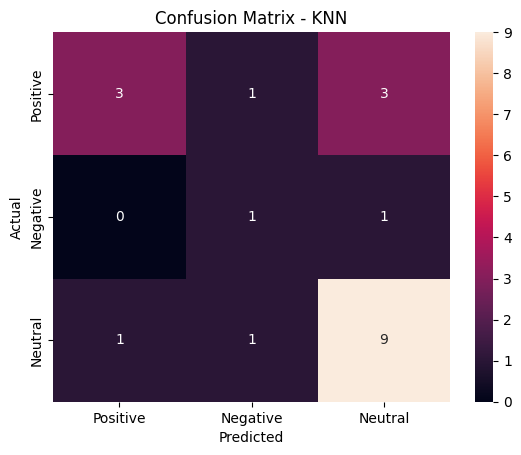

In [11]:
cm = confusion_matrix(y_test, y_pred, labels=["Positive", "Negative", "Neutral"])
sns.heatmap(cm, annot=True, fmt="d", xticklabels=["Positive", "Negative", "Neutral"], yticklabels=["Positive", "Negative", "Neutral"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - KNN")
plt.show()


In [12]:
# Input your own tweets here
new_tweets = ["Trump is doing great!", "This is a disaster!", "Not sure what to say"]
cleaned = [clean_tweet(tweet) for tweet in new_tweets]
X_new = vectorizer.transform(cleaned)

# Predict sentiments
predictions = knn.predict(X_new)
for tweet, sentiment in zip(new_tweets, predictions):
    print(f"{tweet} --> {sentiment}")


Trump is doing great! --> Neutral
This is a disaster! --> Neutral
Not sure what to say --> Positive
